<a href="https://colab.research.google.com/github/brunoras/hora_emocoes/blob/main/Hora_da_Emocoes_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pytrends

In [ ]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
pytrend = TrendReq(hl='pt-BR')

In [ ]:
KEYWORDS=['Alegria', 'Amor', 'Confiança', 'Empatia', 'Gratidão', 'Prazer', 'Inveja', 'Medo', 'Ódio', 'Solidão', 'Tédio', 'Tristeza'] 
KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
df_CODES= pd.DataFrame(KEYWORDS_CODES)
df_CODES

,mid,title,type
0,/m/0134xx0x,Alegria,Assunto
1,/m/048knlz,Amor,Assunto
2,/m/03h1p2,Confiança,Assunto
3,/m/01s169,Empatia,Assunto
4,/m/04f0pl,Gratidão,Assunto
5,/m/016pnd,Prazer,Assunto
6,/m/016whg,Inveja,Assunto
7,/m/02xrl,Medo,Assunto
8,/m/02p64h,Ódio,Assunto
9,/m/05c7vv,Solidão,Assunto



No link temos os códigos das categorias
https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

In [ ]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2021-12-26T03 2022-01-02T02'
COUNTRY=['BR'] 
CATEGORY=0
SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [ ]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)

In [ ]:
df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
df_trends.columns=['data'] + KEYWORDS

In [ ]:
df_trends

,data,Alegria,Amor,Confiança,Empatia,Gratidão,Prazer,Inveja,Medo,Ódio,Solidão,Tédio,Tristeza
0,2021-12-26 03:00:00,46,72,67,19,15,66,58,54,76,58,74,95
1,2021-12-26 04:00:00,40,67,70,14,12,85,68,58,85,74,73,98
2,2021-12-26 05:00:00,37,66,77,17,10,66,58,65,77,100,75,91
3,2021-12-26 06:00:00,36,61,67,11,8,80,51,52,74,70,67,88
4,2021-12-26 07:00:00,42,56,71,13,13,85,99,44,77,73,37,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-01-01 22:00:00,46,53,56,23,21,33,46,41,47,77,81,62
164,2022-01-01 23:00:00,43,56,51,65,18,37,43,42,41,65,79,62
165,2022-01-02 00:00:00,44,58,63,22,19,35,45,42,47,64,94,65
166,2022-01-02 01:00:00,47,63,67,26,20,48,50,46,54,71,71,80


In [ ]:
dia = ['26-12-2021']*24 + ['27-12-2021']*24 + ['28-12-2021']*24 + ['29-12-2021']*24 + ['30-12-2021']*24 + ['31-12-2021']*24 + ['01-01-2022']*24 
hora = [i for i in range(24)]*7
d = {'Dia': dia, 'Hora': hora}
dias = pd.DataFrame(data=d)
dias

,Dia,Hora
0,26-12-2021,0
1,26-12-2021,1
2,26-12-2021,2
3,26-12-2021,3
4,26-12-2021,4
...,...,...
163,01-01-2022,19
164,01-01-2022,20
165,01-01-2022,21
166,01-01-2022,22


In [ ]:
df = pd.concat([dias, df_trends.iloc[0:, 1:]], axis=1)
df

,Dia,Hora,Alegria,Amor,Confiança,Empatia,Gratidão,Prazer,Inveja,Medo,Ódio,Solidão,Tédio,Tristeza
0,26-12-2021,0,46,72,67,19,15,66,58,54,76,58,74,95
1,26-12-2021,1,40,67,70,14,12,85,68,58,85,74,73,98
2,26-12-2021,2,37,66,77,17,10,66,58,65,77,100,75,91
3,26-12-2021,3,36,61,67,11,8,80,51,52,74,70,67,88
4,26-12-2021,4,42,56,71,13,13,85,99,44,77,73,37,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,01-01-2022,19,46,53,56,23,21,33,46,41,47,77,81,62
164,01-01-2022,20,43,56,51,65,18,37,43,42,41,65,79,62
165,01-01-2022,21,44,58,63,22,19,35,45,42,47,64,94,65
166,01-01-2022,22,47,63,67,26,20,48,50,46,54,71,71,80


In [ ]:
dic = {}
for keyword in KEYWORDS:
  dic[keyword] =  [df.loc[df['Hora'] == i][keyword].mean() for i in range(24)]
df_media = pd.DataFrame(data=dic)
df_media

,Alegria,Amor,Confiança,Empatia,Gratidão,Prazer,Inveja,Medo,Ódio,Solidão,Tédio,Tristeza
0,48.714286,73.142857,75.857143,21.857143,23.428571,63.571429,59.285714,61.285714,67.428571,68.571429,59.714286,92.714286
1,39.571429,68.142857,67.142857,21.000000,18.000000,71.000000,62.142857,59.285714,73.285714,70.428571,63.857143,93.000000
2,38.571429,66.714286,70.571429,22.142857,16.142857,73.714286,59.428571,58.714286,73.857143,73.000000,69.857143,90.285714
3,41.142857,63.142857,68.571429,20.142857,14.571429,80.714286,62.714286,57.571429,74.000000,61.714286,53.571429,84.714286
4,35.142857,58.428571,74.571429,18.714286,17.000000,74.571429,68.285714,56.714286,66.571429,52.285714,39.714286,71.428571
5,65.571429,60.285714,71.714286,18.000000,28.285714,62.000000,69.000000,37.571429,40.000000,44.714286,18.857143,46.142857
6,75.285714,56.857143,66.857143,16.142857,34.428571,47.714286,57.571429,32.714286,28.571429,40.714286,15.285714,40.714286
7,79.000000,50.571429,72.428571,21.000000,34.142857,40.142857,49.857143,31.571429,28.571429,30.142857,10.571429,38.428571
8,67.571429,45.428571,68.142857,18.000000,31.571429,36.285714,46.714286,28.142857,30.142857,30.285714,15.571429,38.142857
9,58.571429,40.857143,61.571429,20.285714,27.714286,30.428571,40.428571,28.857143,26.285714,30.714286,22.142857,38.714286


In [ ]:
dic = {}
dia = pd.DataFrame(df['Dia'].unique(), columns=['Dia'])
for keyword in KEYWORDS:
  dic[keyword] =  [df.loc[df['Dia'] == i][keyword].mean() for i in list(df['Dia'].unique())]
df_media_dia = pd.DataFrame(data=dic)
df_media_dia = pd.concat([dia, df_media_dia], axis=1)
df_media_dia

,Dia,Alegria,Amor,Confiança,Empatia,Gratidão,Prazer,Inveja,Medo,Ódio,Solidão,Tédio,Tristeza
0,26-12-2021,52.250000,53.416667,61.208333,15.125000,16.708333,50.000000,52.750000,38.916667,49.625000,55.250000,52.583333,62.250000
1,27-12-2021,40.041667,47.750000,65.125000,16.583333,13.875000,46.041667,48.875000,37.416667,45.291667,39.125000,43.083333,56.916667
2,28-12-2021,42.166667,47.125000,66.666667,17.375000,14.333333,46.833333,50.416667,38.208333,45.958333,40.791667,44.291667,57.375000
3,29-12-2021,43.666667,46.666667,68.541667,18.333333,16.000000,44.000000,53.333333,37.666667,43.875000,41.125000,41.750000,56.333333
4,30-12-2021,46.666667,47.208333,65.208333,19.958333,21.666667,44.375000,51.708333,37.125000,44.208333,44.250000,38.750000,58.041667
5,31-12-2021,55.833333,53.750000,61.375000,25.250000,54.958333,40.791667,44.125000,47.208333,39.333333,51.333333,37.708333,59.458333
6,01-01-2022,51.750000,61.083333,51.625000,29.000000,27.625000,42.208333,45.791667,44.750000,41.625000,62.458333,60.458333,60.500000


In [ ]:
def plot_hora(data, y, title, x_title, color):
  # sns.set(style = 'white')
  sns.set_theme()
  plt.figure(figsize = (12,6))
  sns.barplot(data = data, x=data.index, y=y, color=color)
  plt.title(title, fontsize=30)
  plt.xlabel(x_title, fontsize=20)
  plt.ylabel('Trend', fontsize=20)
  plt.savefig('/content/drive/MyDrive/Emotions/' + y + '_' + x_title + '.png', dpi=300, bbox_inches='tight')
  plt.show()

In [ ]:
def plot_dia(data, x, y, title, x_title, color):
  # sns.set(style = 'white')
  sns.set_theme()
  plt.figure(figsize = (12,6))
  sns.barplot(data = data, x=x, y=y, color=color)
  plt.title(title, fontsize=30)
  # plt.xlabel(x_title, fontsize=20)
  plt.ylabel('Trend', fontsize=20)
  plt.savefig('/content/drive/MyDrive/Emotions/' + y + '_' + x_title + '.png', dpi=300, bbox_inches='tight')
  plt.show()

In [ ]:
port_b = ['Alegria', 'Amor', 'Confiança', 'Empatia', 'Gratidão', 'Prazer']
port_r = ['Inveja', 'Medo', 'Ódio', 'Solidão', 'Tédio', 'Tristeza']
eng_g = ['Happiness', 'Love', 'Confidence', 'Empathy', 'Gratitude', 'Pleasure']
eng_b = ['Envy', 'Fear', 'Hate', 'Loneliness', 'Boredom', 'Sadness']

x_dia = ['26/12 (Dom)', '27/12 (Seg)', '28/12(Ter)', '29/12 (Qua)', '30/12 (Qui)', '31/12 (Sex)', '01/01 (Sáb)']
x_day = ['12-26 (Sun)', '12-27 (Mon)', '12-28 (Tue)', '12-29 (Wed)', '12-30 (Thu)', '12-31 (Fri)', '01-01 (Sat)']

## Português

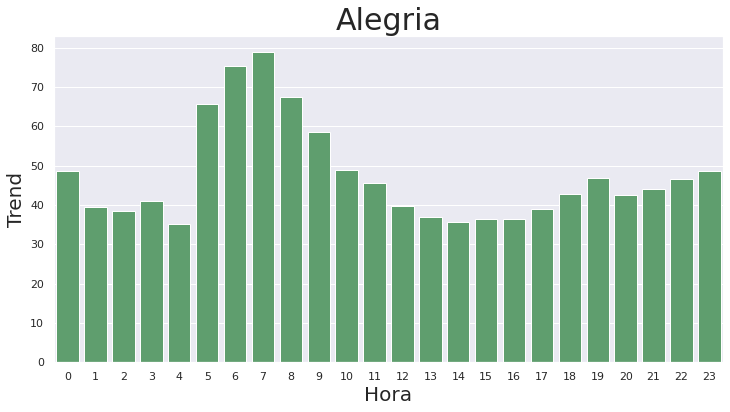

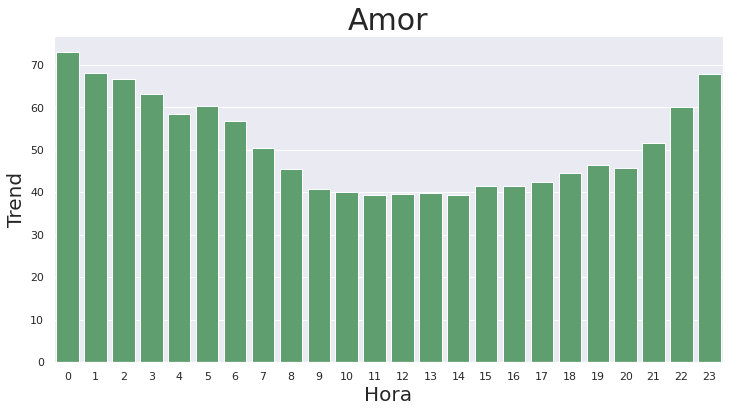

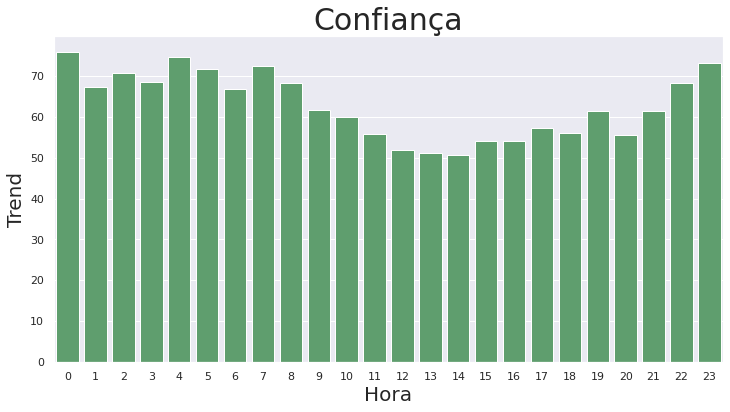

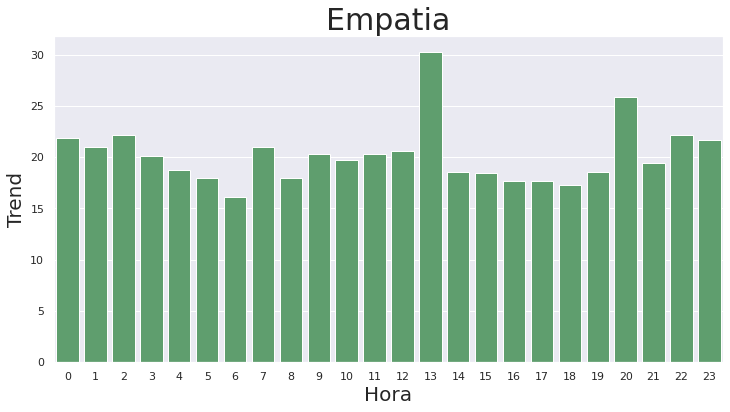

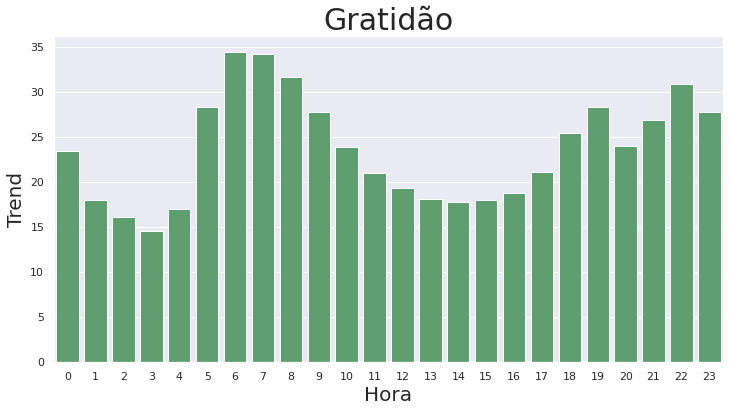

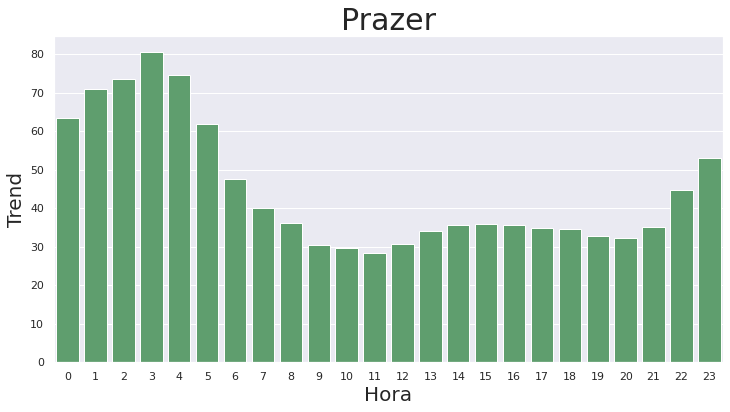

In [ ]:
for keyword in port_b:
  plot_hora(df_media, keyword, keyword, 'Hora', 'g')

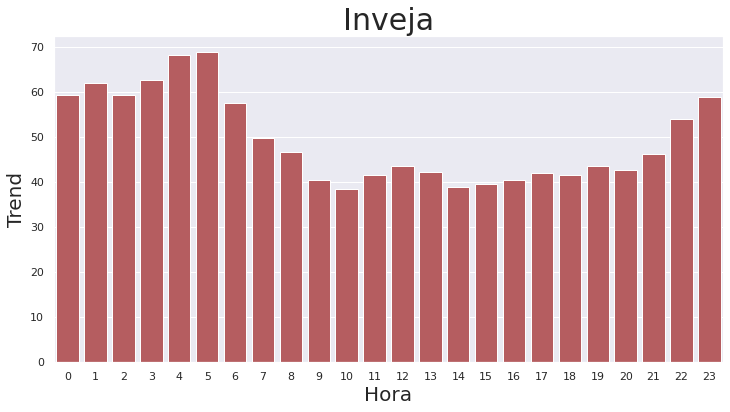

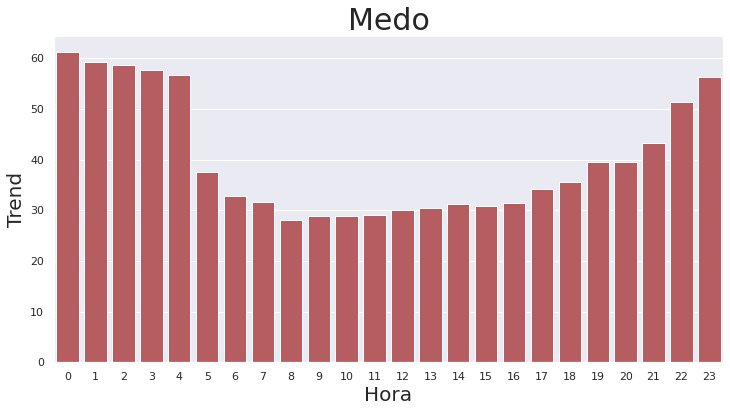

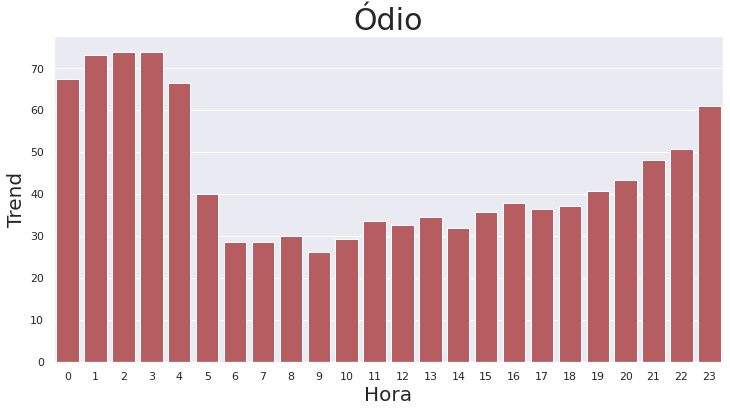

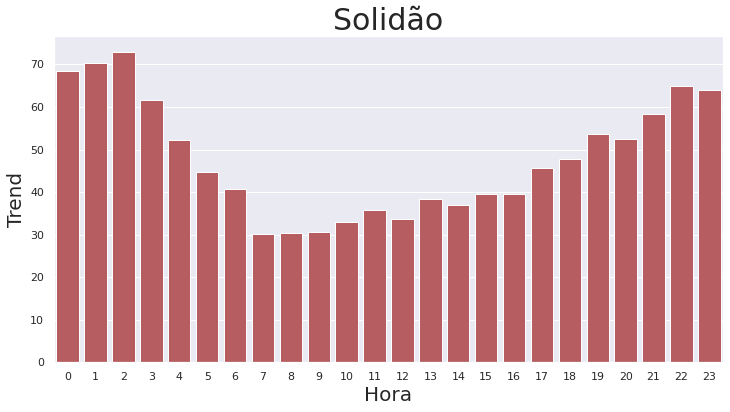

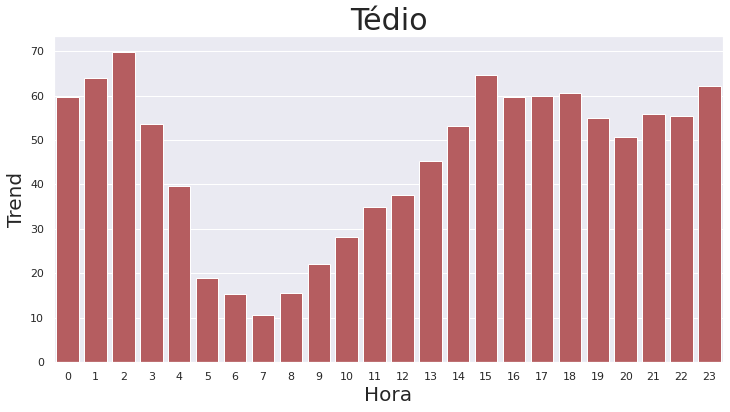

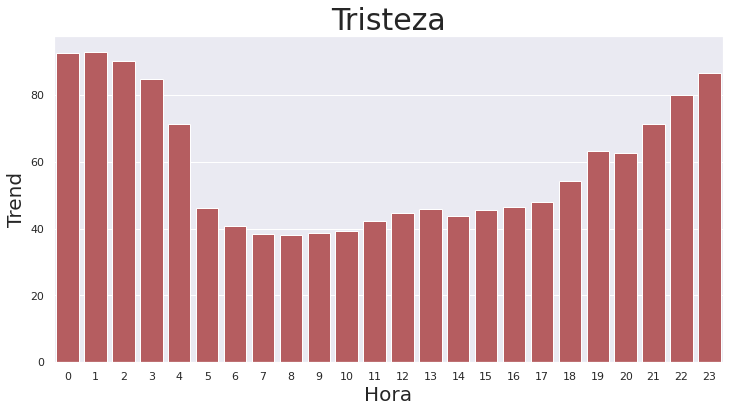

In [ ]:
for keyword in port_r:
  plot_hora(df_media, keyword, keyword, 'Hora', 'r')

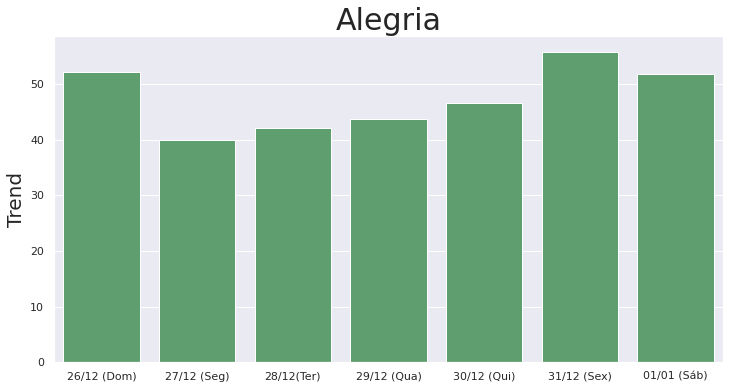

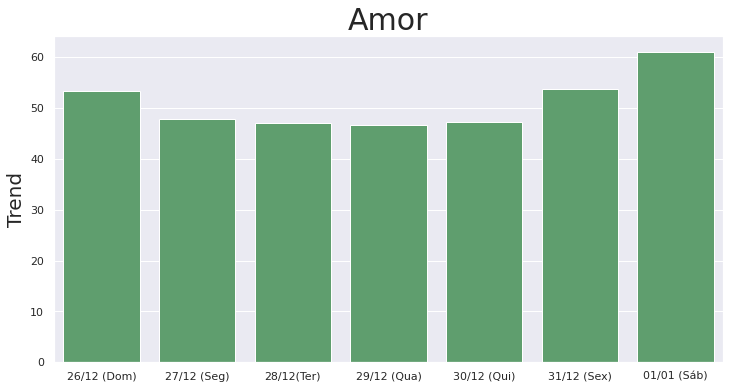

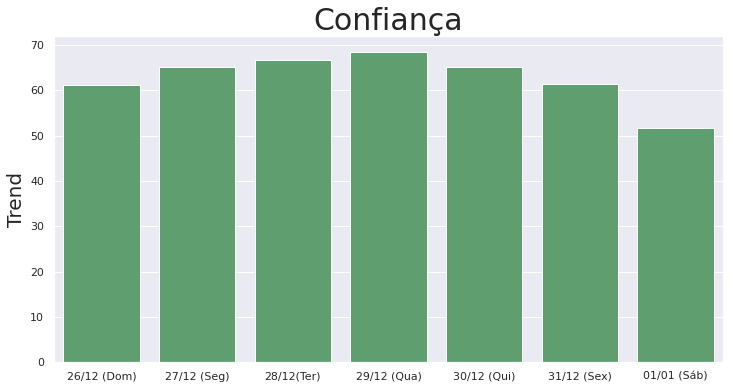

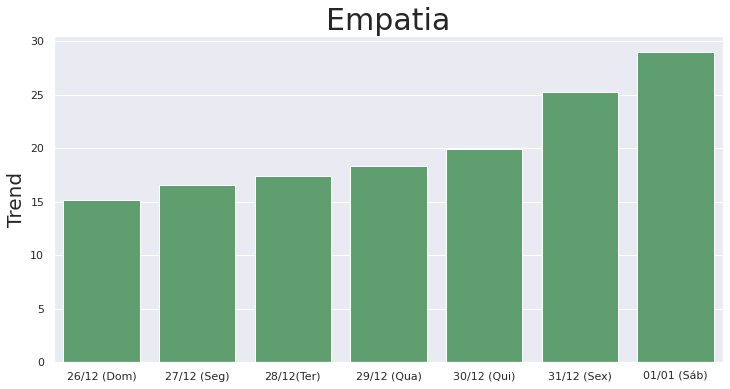

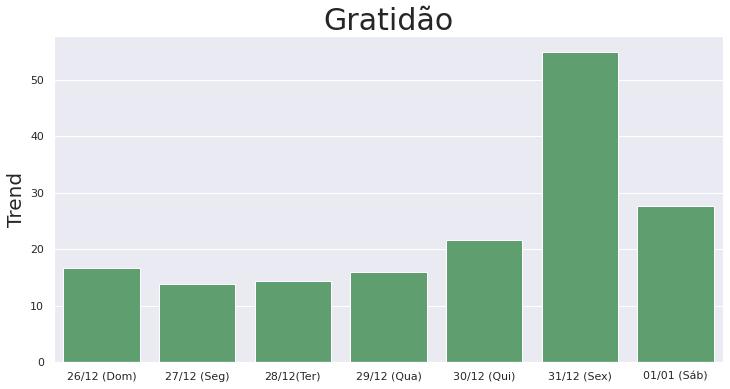

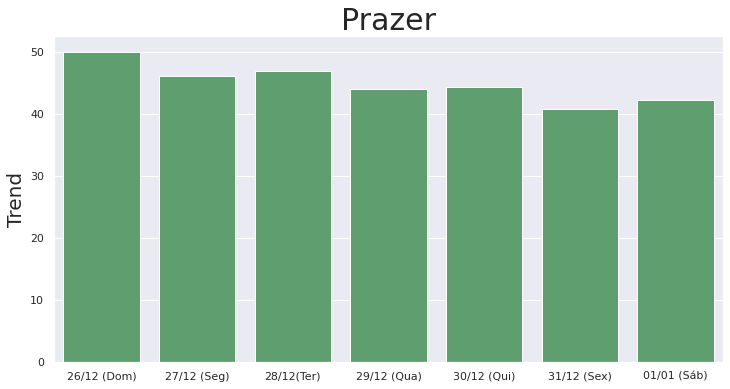

In [ ]:
for keyword in port_b:
  plot_dia(df_media_dia, x_dia, keyword, keyword, 'Dia', 'g')

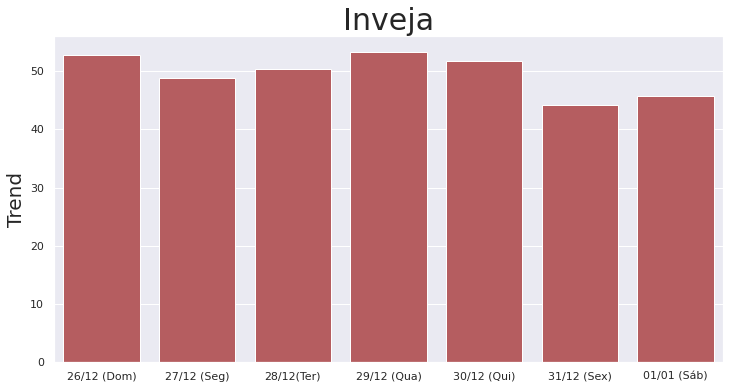

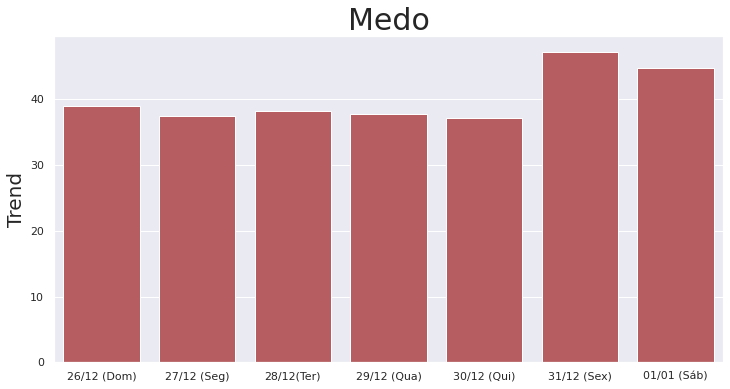

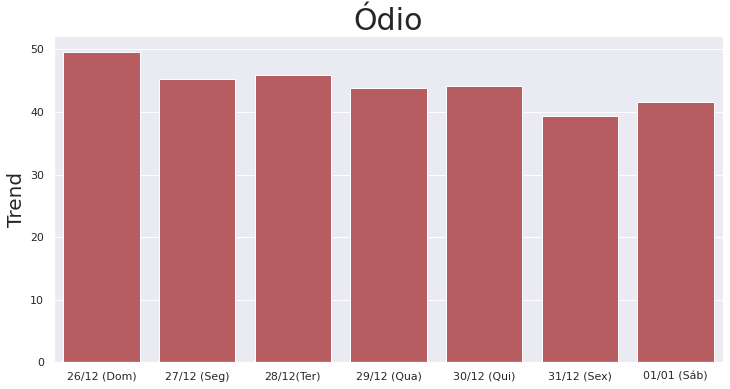

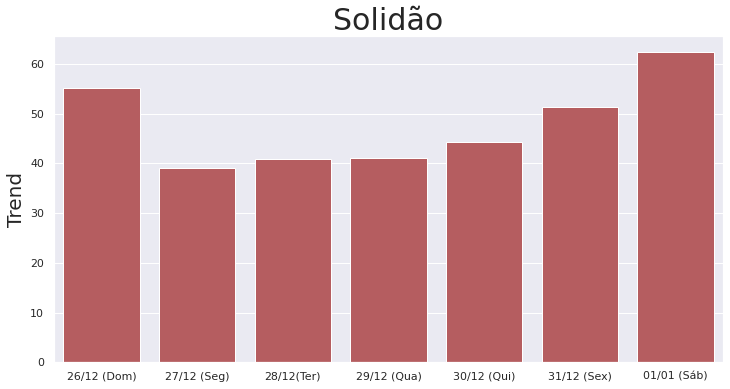

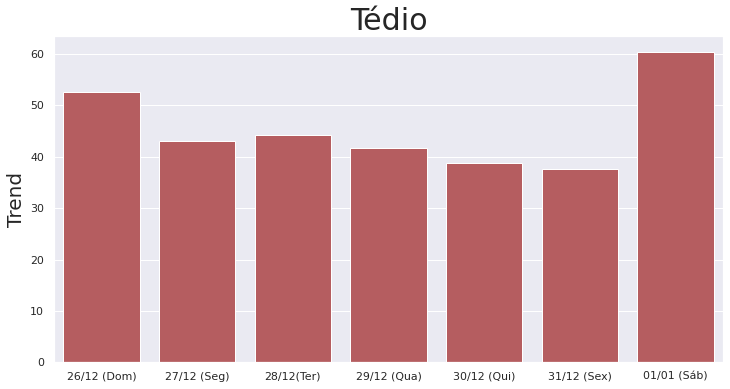

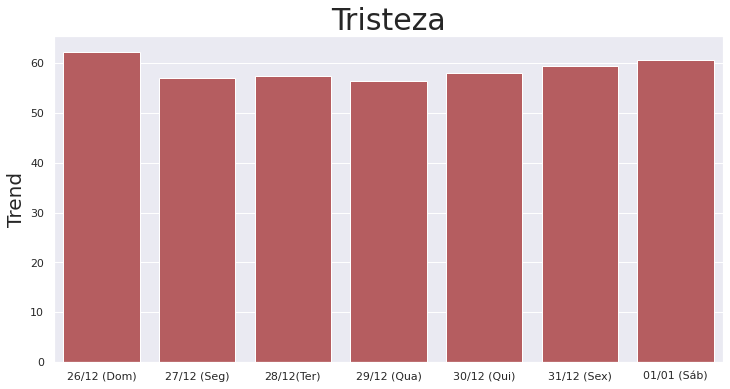

In [ ]:
for keyword in port_r:
  plot_dia(df_media_dia, x_dia, keyword, keyword, 'Dia', 'r')

## English

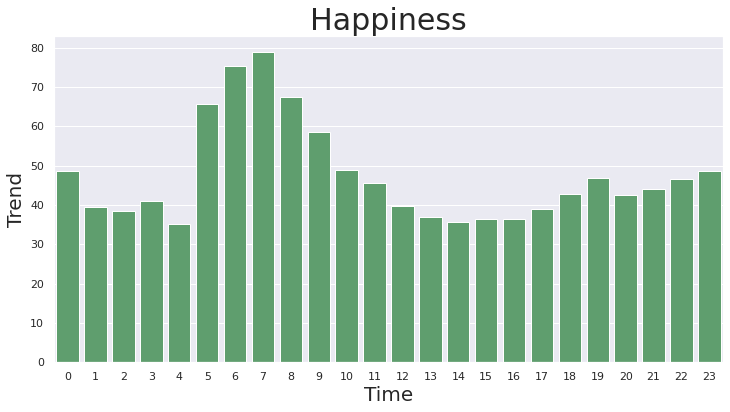

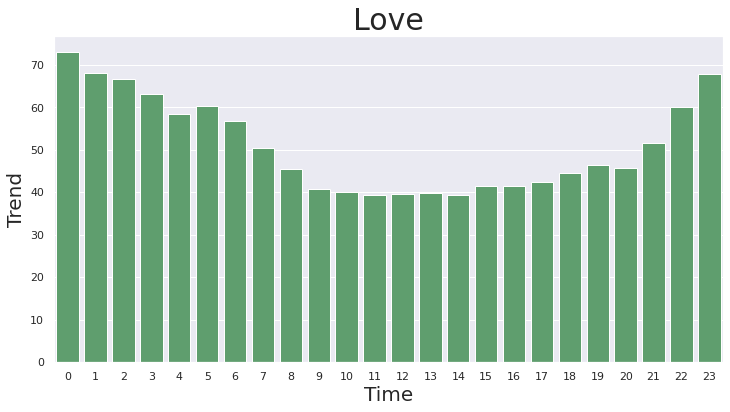

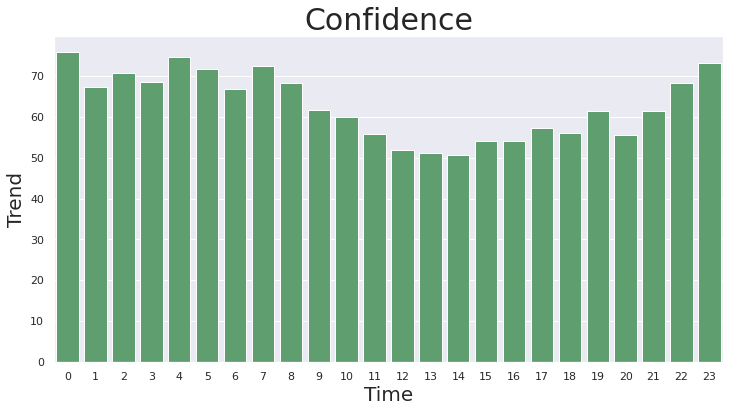

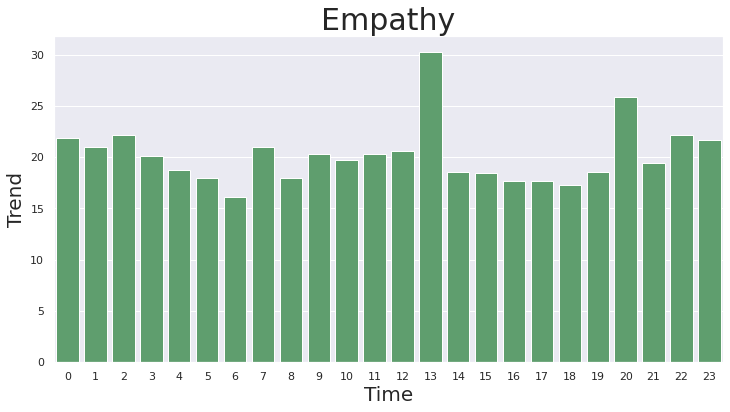

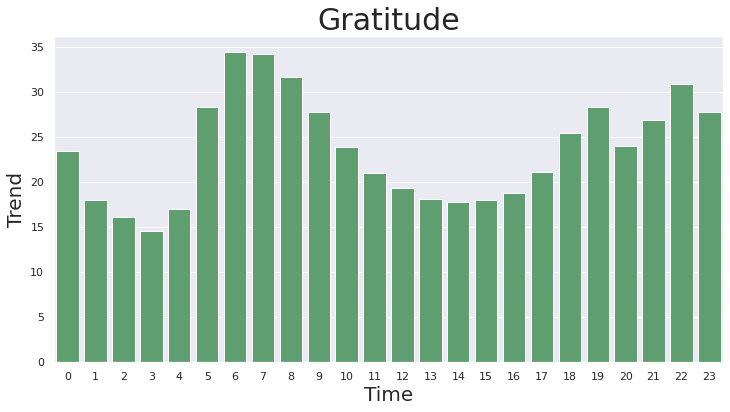

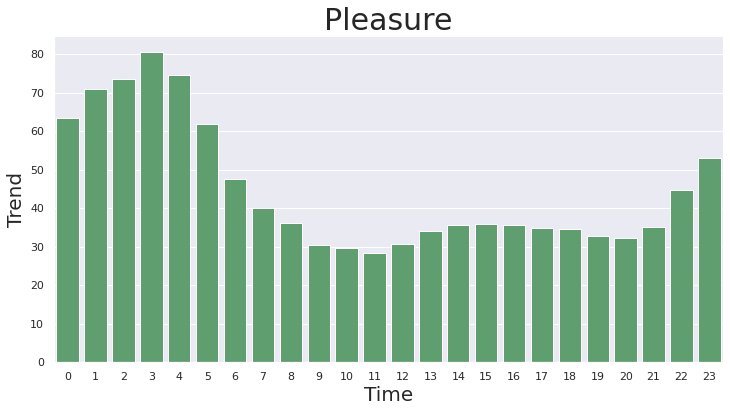

In [ ]:
for pt, en in zip(port_b, eng_g):
  plot_hora(df_media, pt, en, 'Time', 'g')

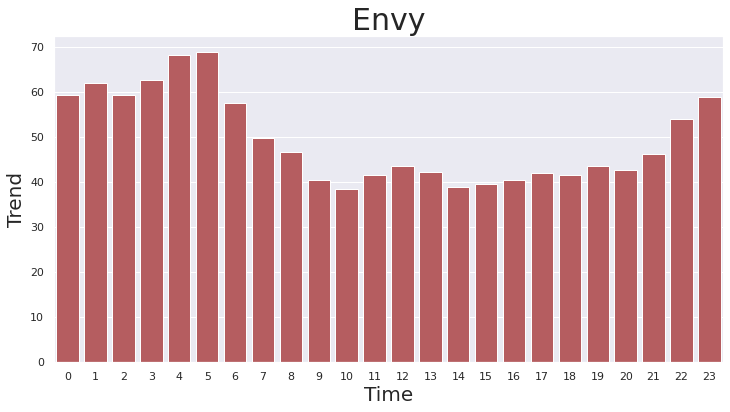

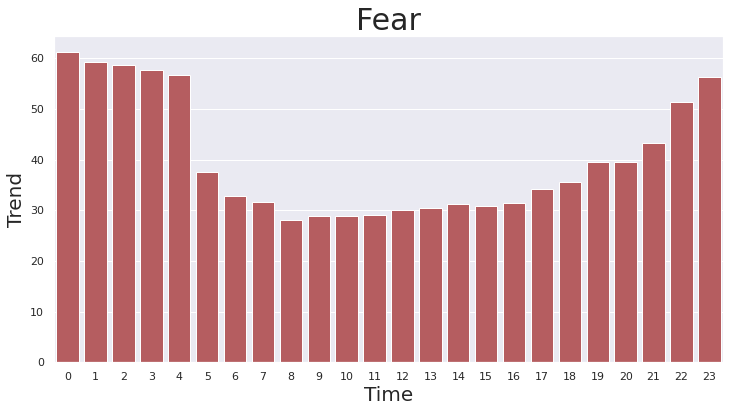

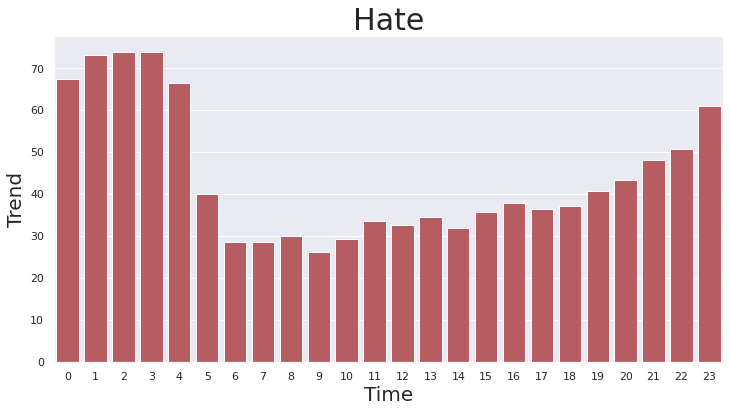

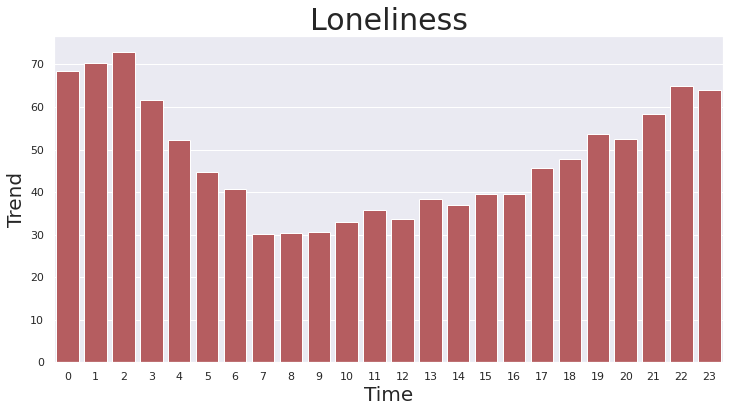

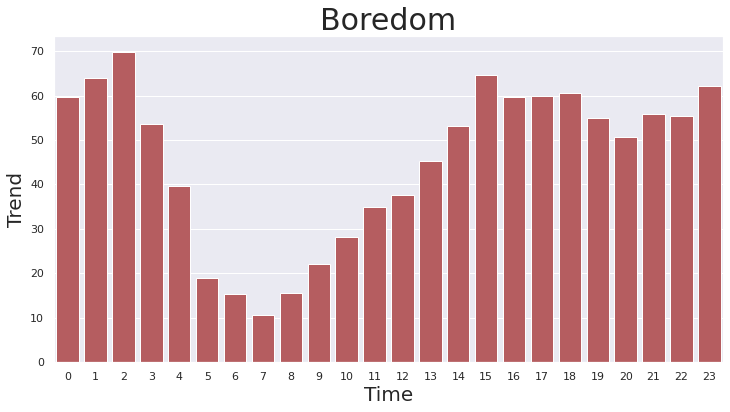

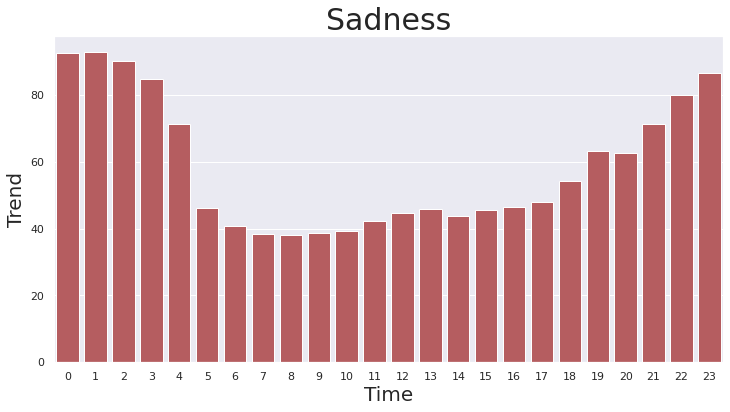

In [ ]:
for pt, en in zip(port_r, eng_b):
  plot_hora(df_media, pt, en, 'Time', 'r')

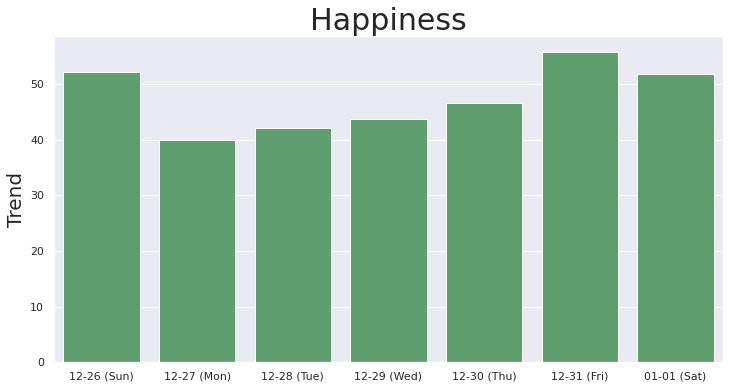

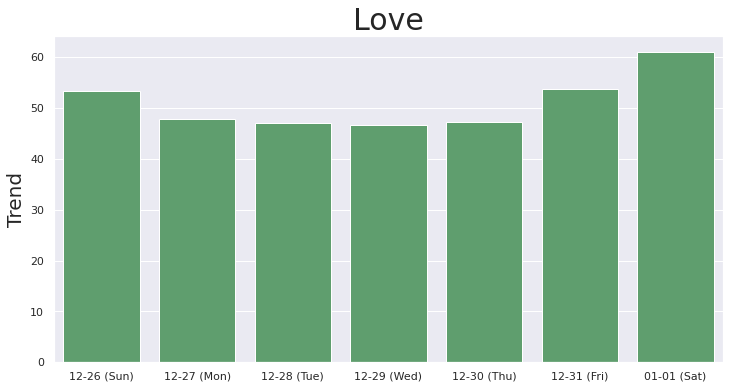

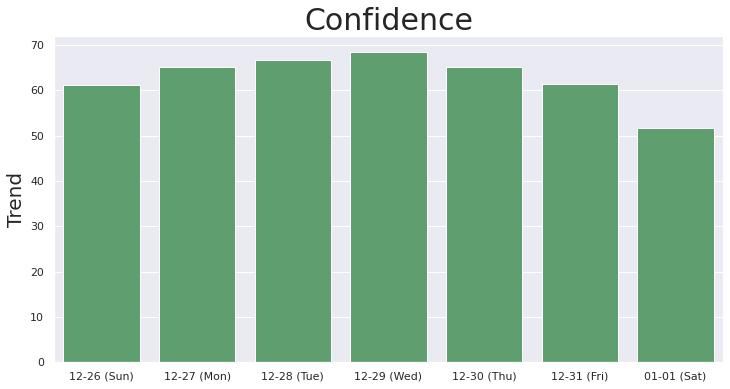

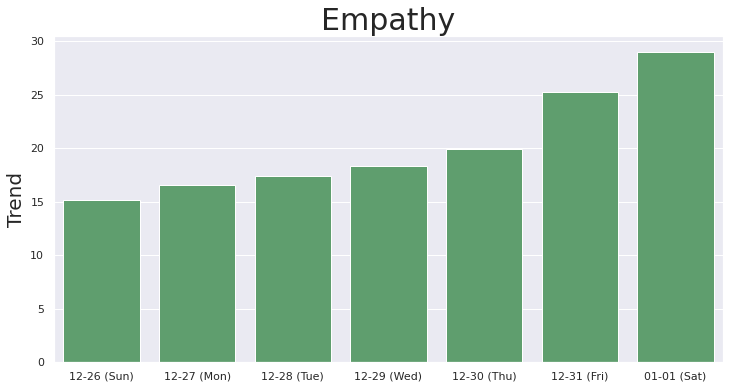

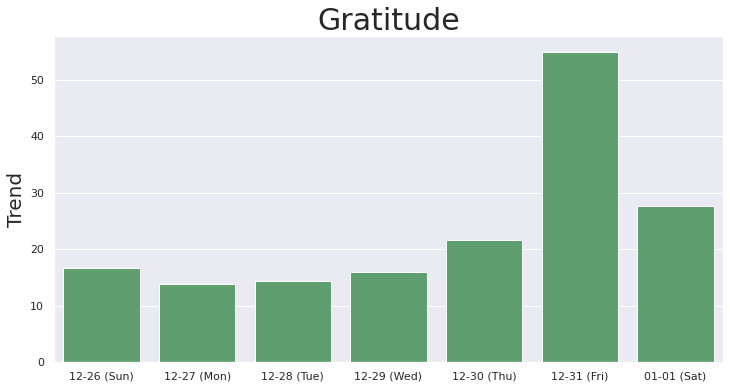

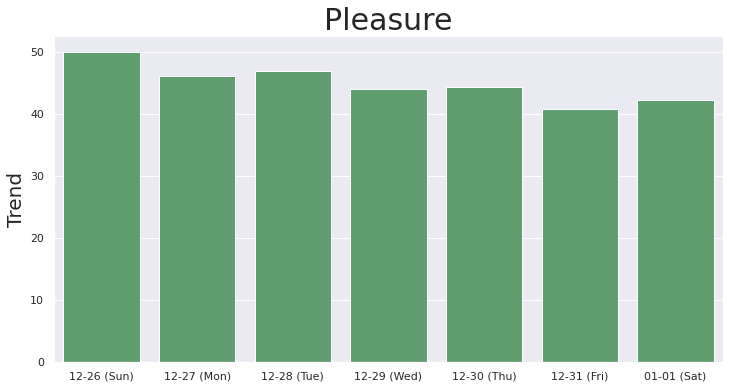

In [ ]:
for pt, en in zip(port_b, eng_g):
  plot_dia(df_media_dia, x_day, pt, en, 'Day', 'g')

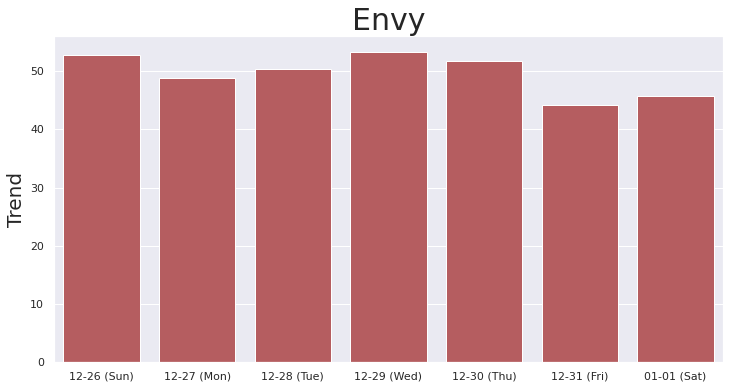

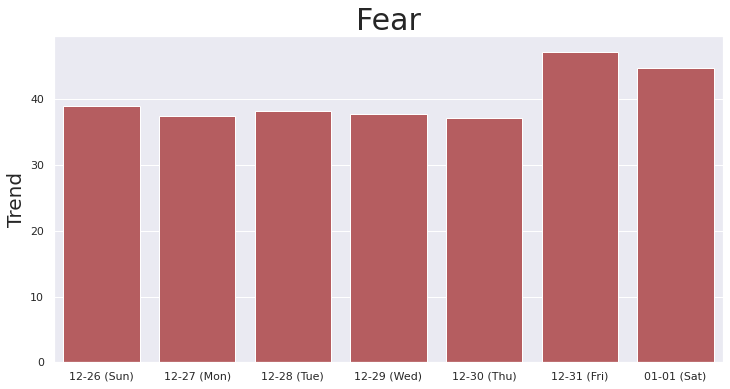

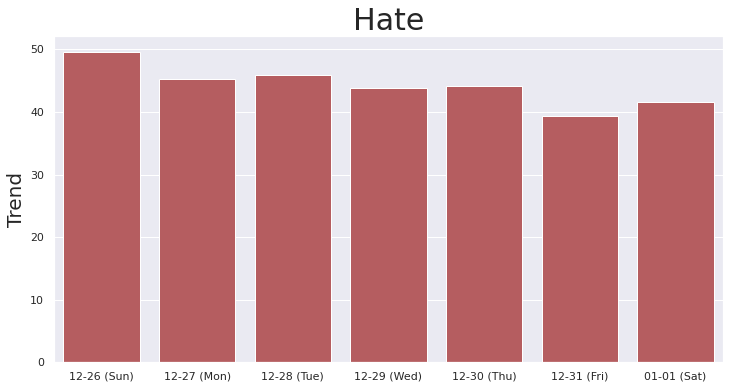

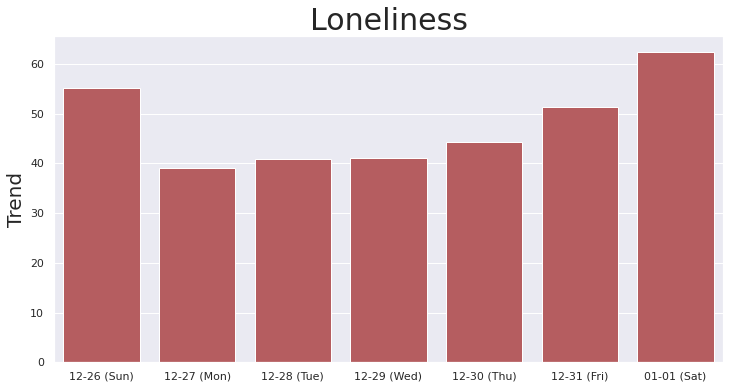

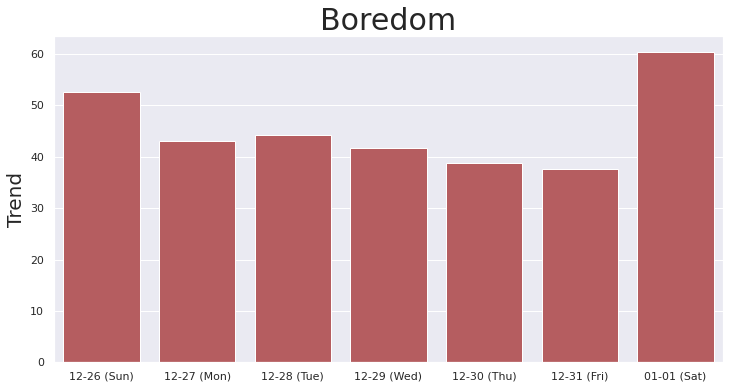

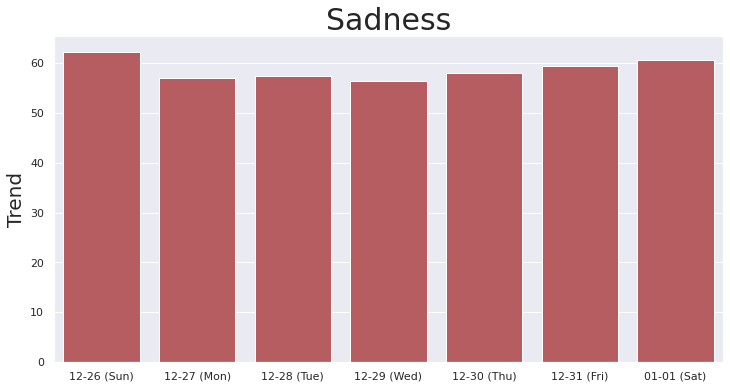

In [ ]:
for pt, en in zip(port_r, eng_b):
  plot_dia(df_media_dia, x_day, pt, en, 'Day', 'r')